In [10]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import sncosmo
from astropy.table import Column

In [2]:
filename = "/home/jpreyes/Downloads/SNDATA_ROOT/SIM/jpreyes/jpreyes_SN057004.DAT"
filedir = "/datadec/cppm/jpreyes/SNANA_SIM"

In [3]:
snfiles = [f for f in listdir(filedir) if isfile(join(filedir, f))]

In [4]:
colors = {"g":"green", "r":"red", "i":"purple", "z":"blue"}
def plot_lc(sn):
    grouped_sn = sn.group_by("FLT")
    indexes = grouped_sn.groups.indices
    last = -1
    current = -1
    for i in indexes:
        current = i
        if last !=-1:
             sub_sn = grouped_sn[last:current]
             filter = sub_sn[0]["FLT"]
             plt.errorbar(sub_sn["MJD"], sub_sn["FLUXCAL"], yerr=sub_sn["FLUXCALERR"],linestyle="None", label=filter, color=colors[filter], fmt=".")
        last = current
    plt.legend()
    plt.show()
        

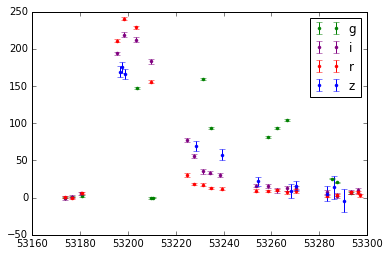

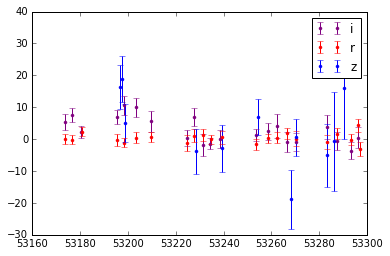

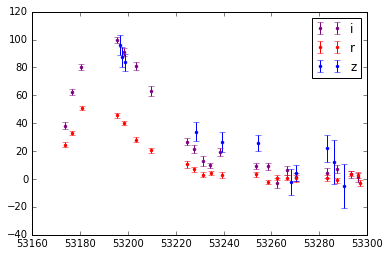

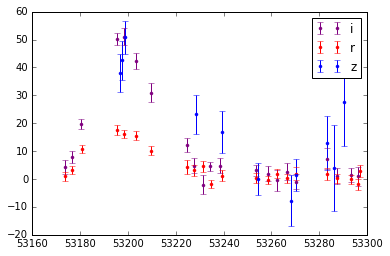

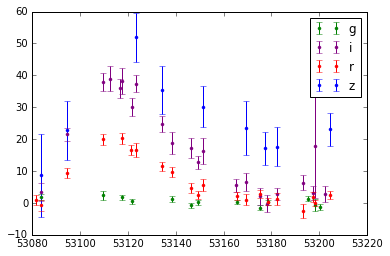

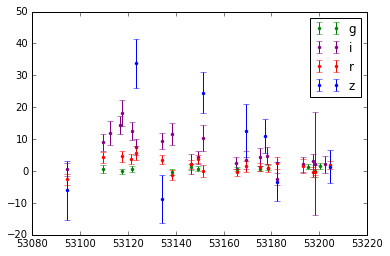

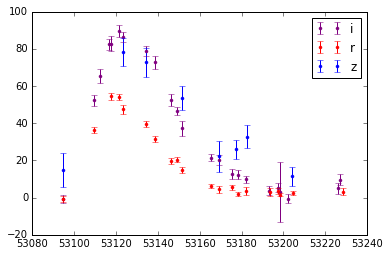

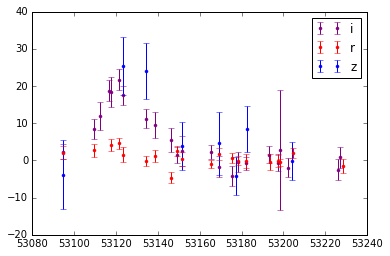

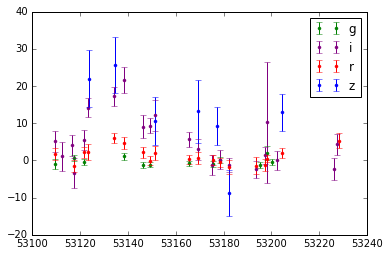

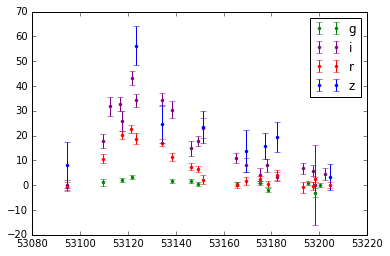

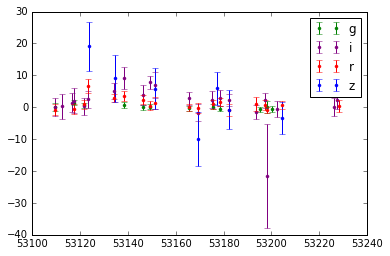

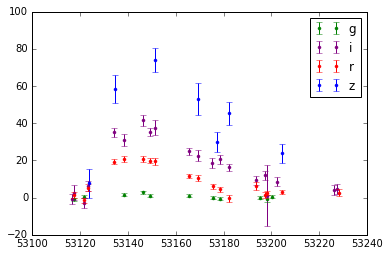

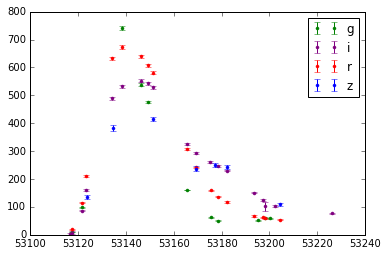

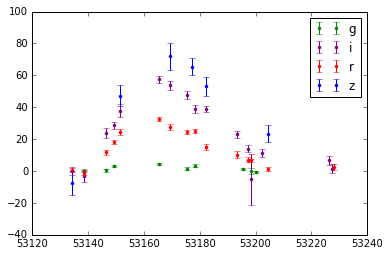

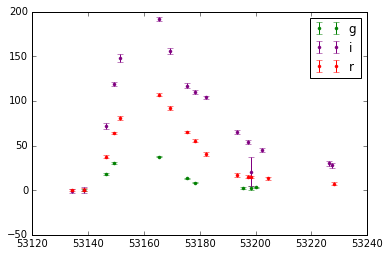

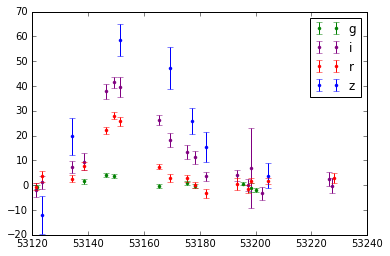

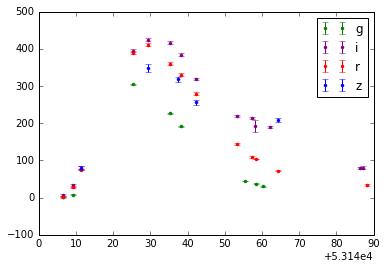

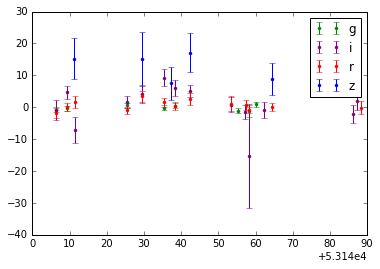

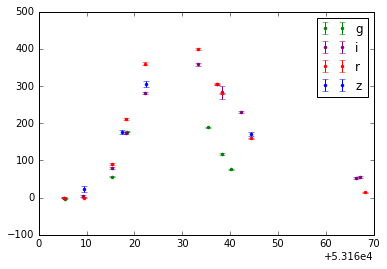

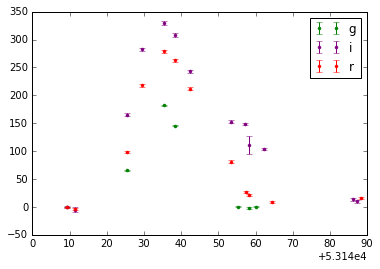

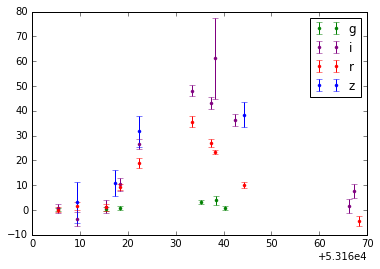

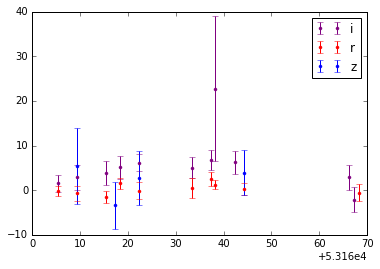

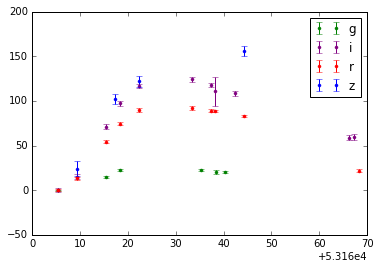

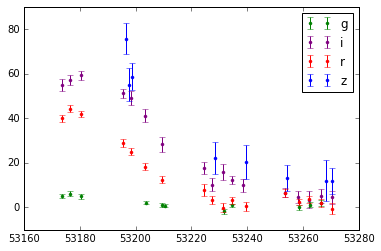

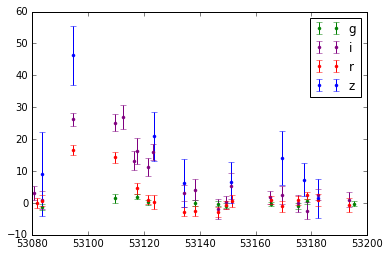

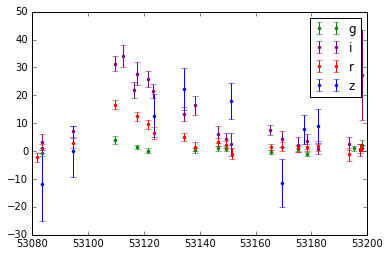

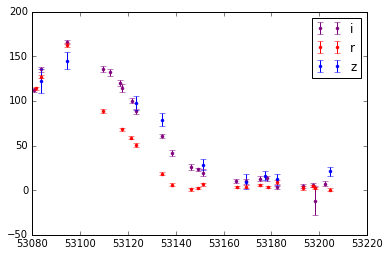

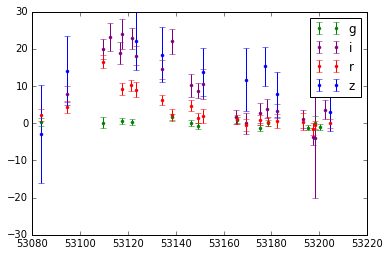

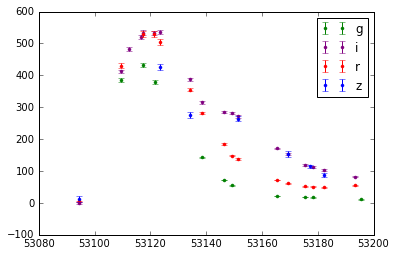

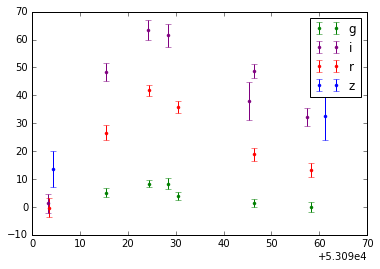

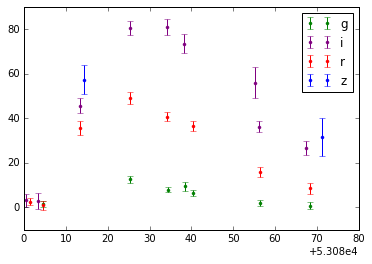

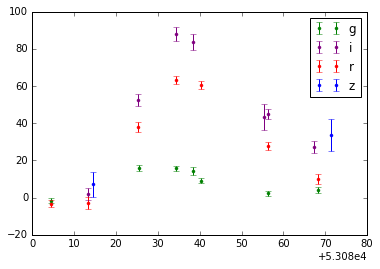

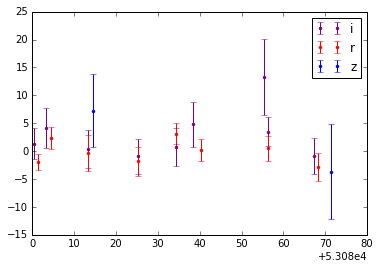

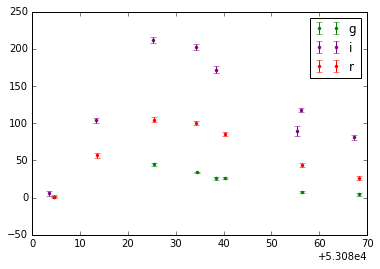

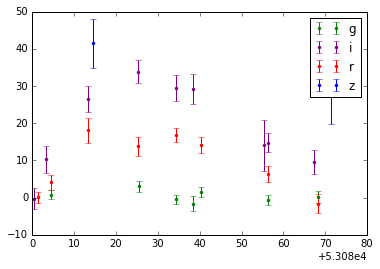

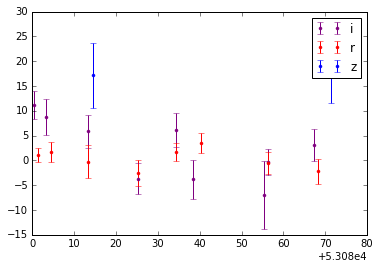

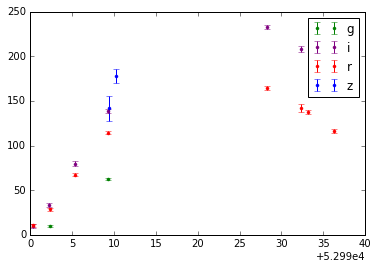

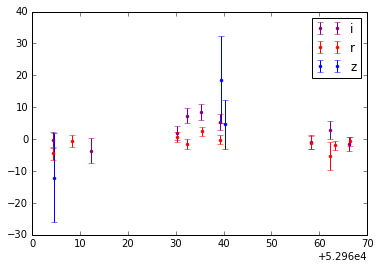

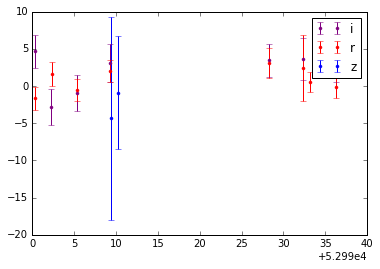

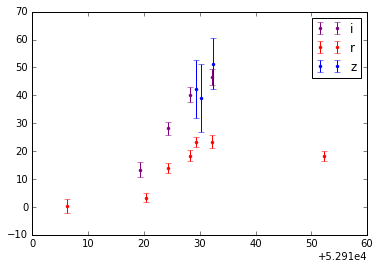

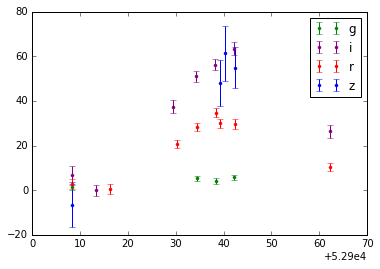

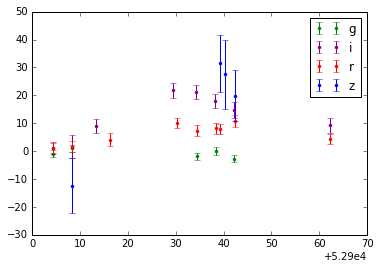

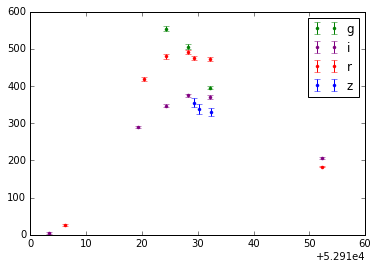

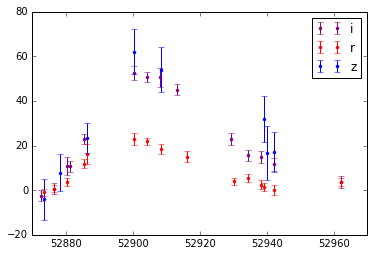

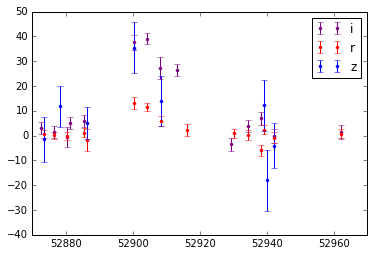

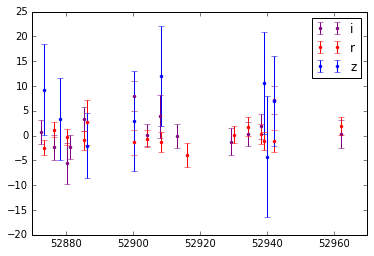

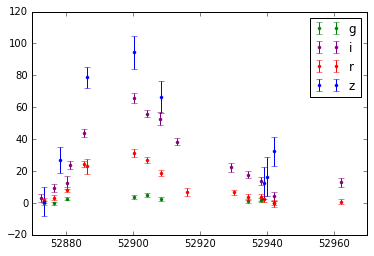

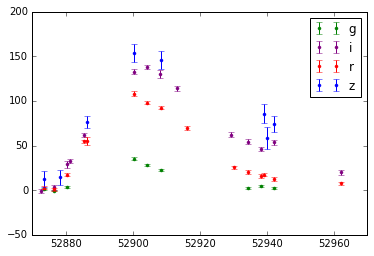

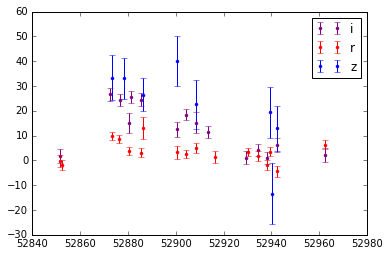

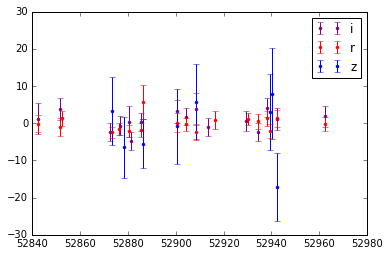

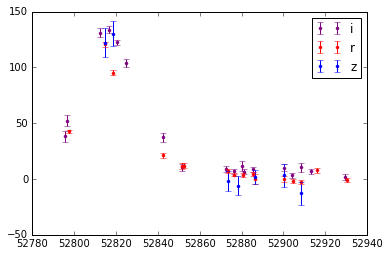

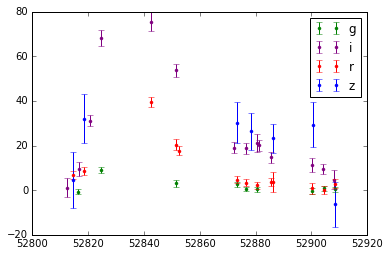

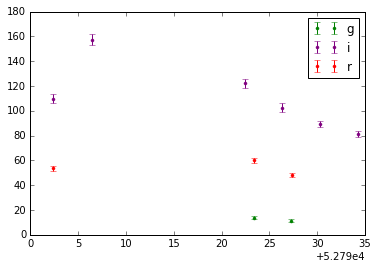

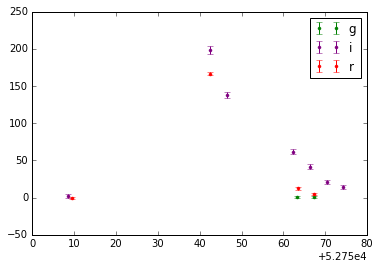

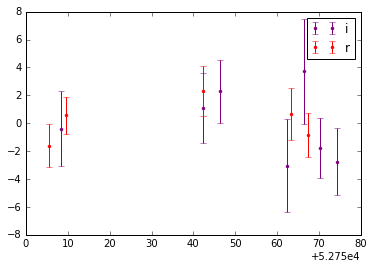

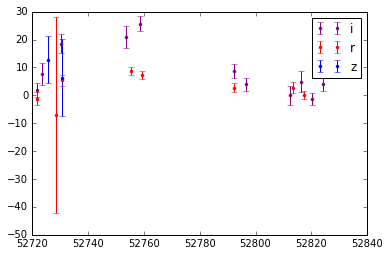

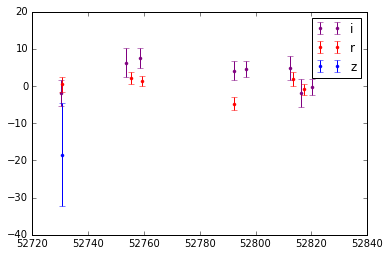

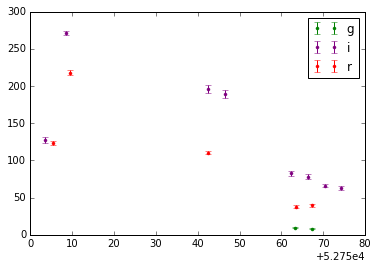

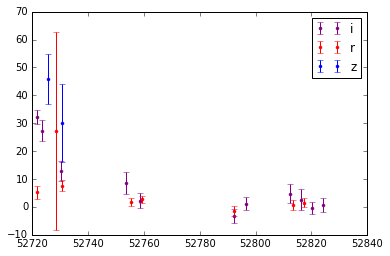

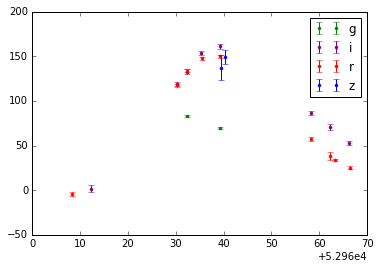

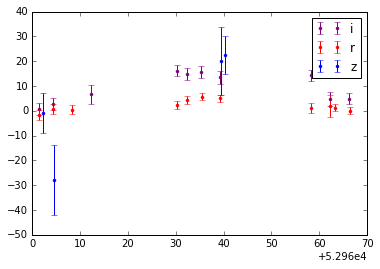

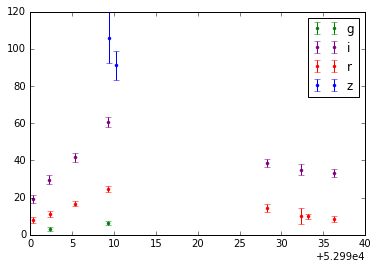

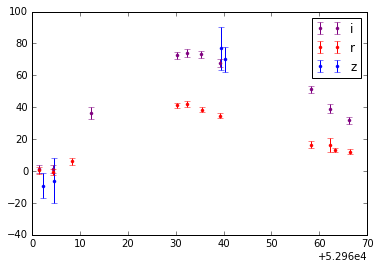

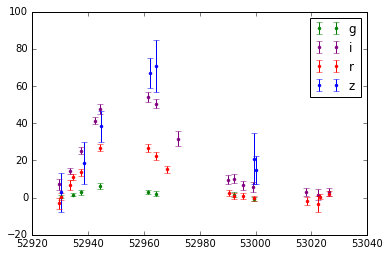

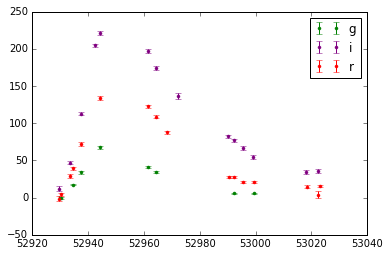

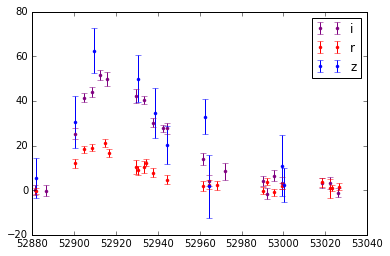

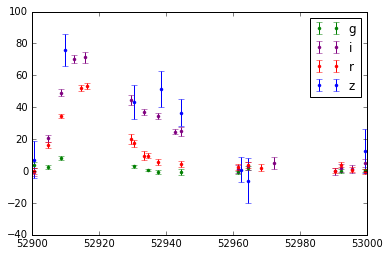

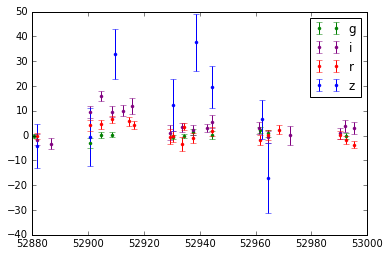

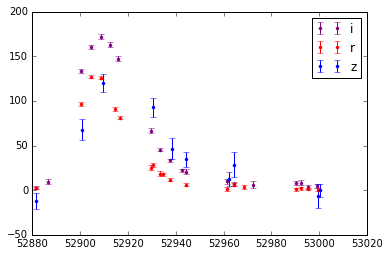

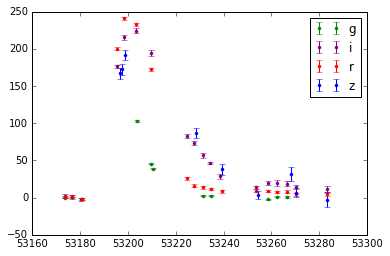

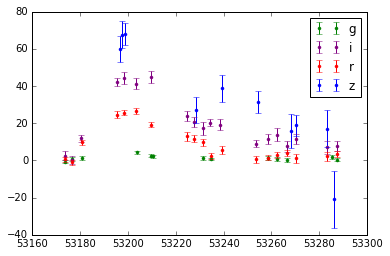

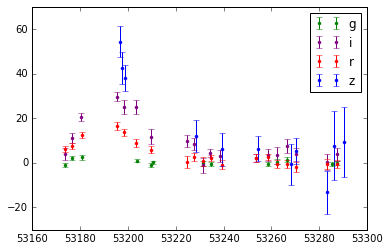

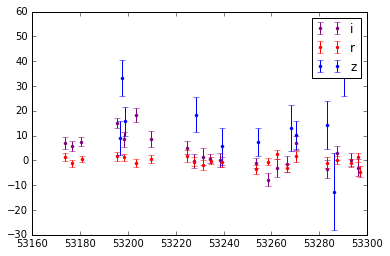

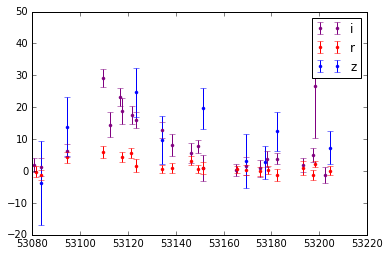

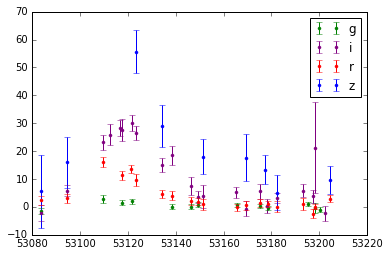

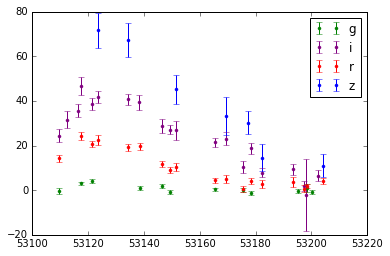

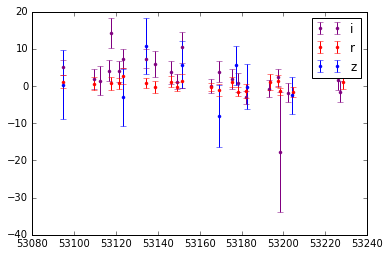

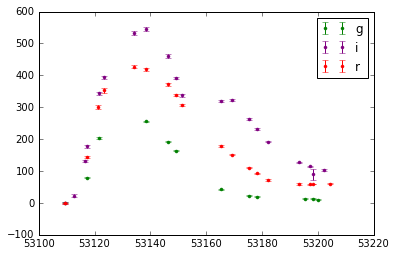

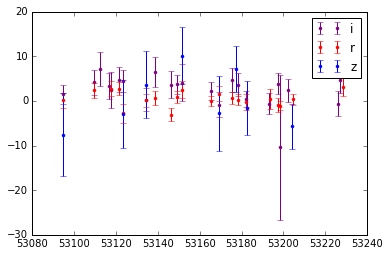

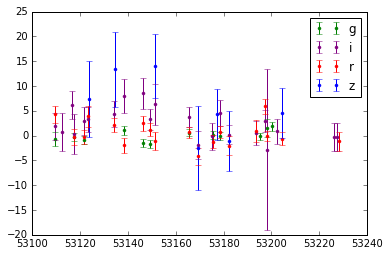

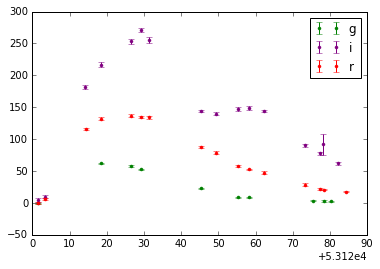

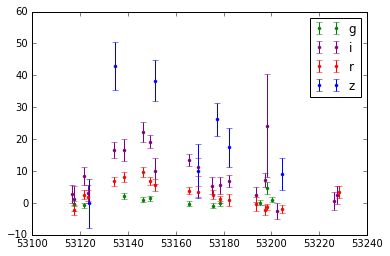

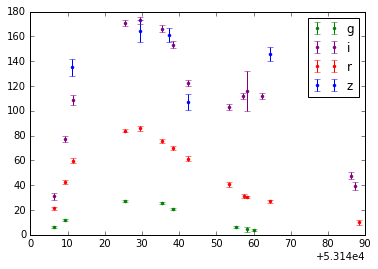

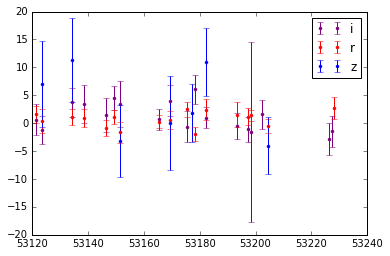

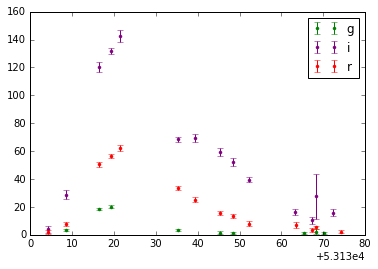

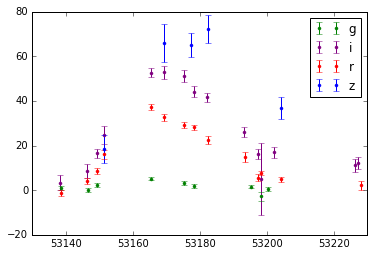

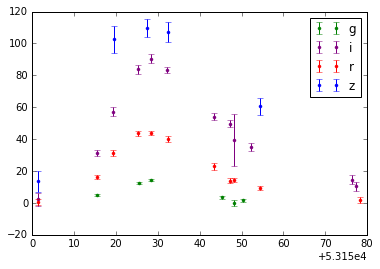

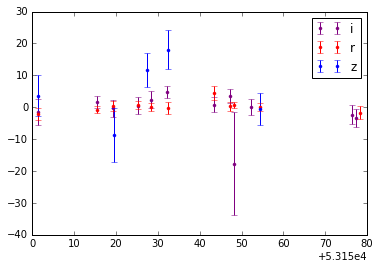

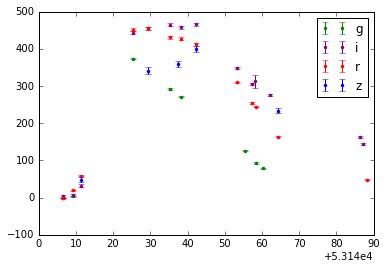

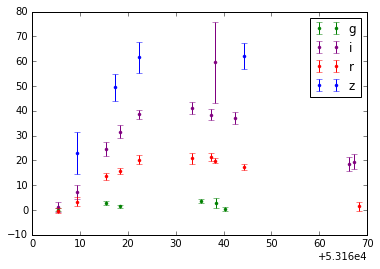

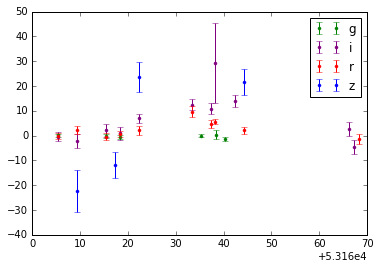

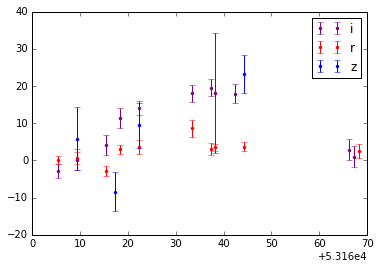

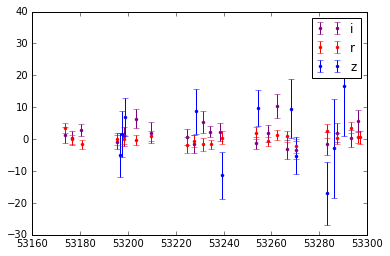

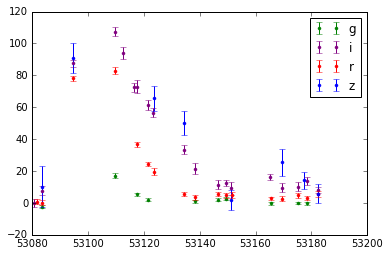

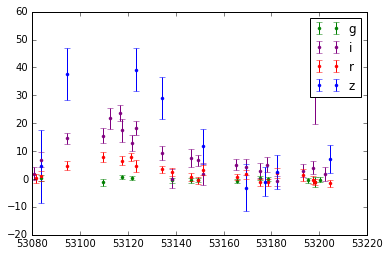

In [13]:
snls_array = []
for snfile in snfiles:
    if snfile.startswith("jpreyes_"):
        
        sn_obj, tables = sncosmo.read_snana_ascii(filedir+"/"+snfile, default_tablename ="OBS")
        sn = tables['OBS']
        plot_lc(sn)
        
        sn.rename_column("FLUXCAL", "flux")
        sn.rename_column("FLUXCALERR", "flux_error")
        zpsys_col = Column(["ab"]*len(sn), name="zpsys")
        sn.add_column(zpsys_col)
        
        filters = []
        for row in sn:
            filters.append("sdss"+row["FLT"])
        sn.remove_column("FLT")
        sn.add_column(Column(filters, name="FLT"))

        
        snls_array.append(sn)
        

In [16]:
lenghts = []
for sn_lc in snls_array:
    lenghts.append(len(sn_lc))

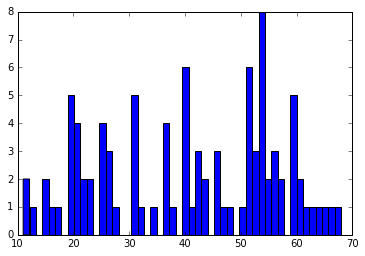

In [19]:
plt.hist(lenghts, bins=50)
plt.show()